## Planet Data WGS84/UTM 18N (EPSG:32618)
Image from Mozaic C4 planet data, and shapefile. The precision of this satelites images are 3m pixels at ground and the image size is 1668 x 1668

In [29]:
!pip install geopandas

In [30]:
! pip install rasterio

In [31]:
!pip install matplotlib

In [32]:
! pip install numpy

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio

from rasterio.plot import show

In [34]:
##############
# PLANET Viz
###########

In [35]:
# fp = r'data/Tile D5/Planet_D5_FullScene/20170929_145600-01_Mosaic_clip.tif' 
# #'data/Tile C4/Planet_C4_FullScene/20170501_145608-07_Mosaic_Clip.tif'
# shape_file = 'data\\Tile D5\\GTD_Trees_Location_D5.shp'
# #'data/Tile D5/GTD_Trees_Locations_D5.shp'

# planet_img = rasterio.open(fp)
# geo_points = gpd.read_file(shape_file)
# planet_img.crs, geo_points.crs

In [36]:
def np_points(geo_points, geo_img):
  width, height = geo_img.shape
  left, bottom, right, top = geo_img.bounds

  if geo_img.crs.to_string() != geo_points.crs.to_string():
    geo_points = geo_points.to_crs(geo_img.crs.to_string())
  new_points = geo_points.geometry.translate(xoff=-left, yoff=-bottom, zoff=0.0)

  x_ratio = float(width) / (right - left)
  y_ratio = float(height) / (top - bottom)

  new_points = new_points.affine_transform([x_ratio, 0, 0, -y_ratio, 0, height])
  return np.array([[int(point.x), int(point.y)] for point in new_points.geometry.tolist()])

In [37]:
# f, ax = plt.subplots(figsize=(10, 10))
# show(planet_img, ax=ax)
# geo_points.plot(ax=ax, c='r')
# plt.show()

In [38]:
# points = np_points(geo_points, planet_img)

# f, ax = plt.subplots(1, 4, figsize=(40, 10))

# for i in range(4):
#   ax[i].imshow(planet_img.read(i+1))
#   ax[i].scatter(points.T[0], points.T[1], c='r')

## Sentinel-2 Data
Let's show the same tile Mozaic C4 from Sentinel-2 data, and sameshapefile. The precision of this satelites images are 10m pixels at ground and the image size is 509 x 508. The crs is epsg:32617, that means that we must convert the data to be at the same CRS. 

In [39]:
# fp = r'data/Tile C4/Sentinel_C4/S2A_MSIL1C_20170716T153621_N0205_R068_T17NRJ_20170716T154039_Visual_clip.tif'
# sentinel_img = rasterio.open(fp)
# sentinel_img.crs.to_string(), geo_points.crs.to_string(), sentinel_img.shape

In [40]:
# f, ax = plt.subplots(figsize=(10, 10))
# show(sentinel_img, ax=ax)

# sentinel_points = geo_points.to_crs(sentinel_img.crs.to_string())
# sentinel_points.plot(ax=ax, c='r')
# plt.show()

In [41]:
# points = np_points(geo_points, sentinel_img)

# f, ax = plt.subplots(1, 4, figsize=(40, 10))

# for i in range(4):
#   ax[i].imshow(sentinel_img.read(i+1))
#   ax[i].scatter(points.T[0], points.T[1], c='r')

## Dataset creation

In [42]:
! pip install torch

In [43]:
import torch

In [44]:
import glob
import pandas as pd

from torch.utils.data import Dataset

In [45]:
DATA_PATH = 'data'
data_map = []
pla_map = []

for tile in glob.glob(f'{DATA_PATH}/Tile *'):
  shape_files = glob.glob(f'{tile}/*.shp')
  if len(shape_files) == 0:
    continue

  for planet_img in glob.glob(f'{tile}/Planet_*_FullScene/*.tif'):
    data_map.extend([planet_img, shape_files[0]])
    pla_map.append(planet_img)
  
#   for sentinel_img in glob.glob(f'{tile}/Sentinel_*/*.tif'):
#     data_map.extend([sentinel_img, shape_files[0]])

# print(data_map[1::2])

df = pd.DataFrame({'img_path': data_map[::2], 'shape_path': data_map[1::2]})
#df.shape
#len(data_map)
#print(pla_map)

In [46]:
df.head()

,img_path,shape_path
0,data\Tile C4\Planet_C4_FullScene\20170501_1456...,data\Tile C4\GTD_Trees_Locations_C4.shp
1,data\Tile C4\Planet_C4_FullScene\20190924_1519...,data\Tile C4\GTD_Trees_Locations_C4.shp
2,data\Tile C4\Planet_C4_FullScene\20190925_1436...,data\Tile C4\GTD_Trees_Locations_C4.shp
3,data\Tile C4\Planet_C4_FullScene\20191006_1433...,data\Tile C4\GTD_Trees_Locations_C4.shp
4,data\Tile C4\Planet_C4_FullScene\20200604_1352...,data\Tile C4\GTD_Trees_Locations_C4.shp


In [47]:
!pip install --upgrade pip
!pip install --upgrade Pillow

In [48]:
# # d5_img = r'data/Tile D5/Planet_D5_FullScene/20170929_145600-01_Mosaic_clip.tif'
# # d5_shp = 'data\\Tile D5\\GTD_Trees_Location_D5.shp'
# points = np_points(geo_points, planet_img)

# f, ax = plt.subplots(1, 4, figsize=(40, 10))

# for i in range(4):
#   ax[i].imshow(planet_img.read(i+1))
#   ax[i].scatter(points.T[0], points.T[1], c='r')

NameError: name 'geo_points' is not defined

In [51]:
RADIUS = 5
# dummy function
def create_circular_mask(radius=5):
  center = (radius, radius)
  Y, X = np.ogrid[:radius*2 + 1, :radius*2 + 1]
  dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

  mask = np.zeros((2*radius + 1, 2*radius + 1))
  mask[dist_from_center <= radius] = 1
  return mask

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


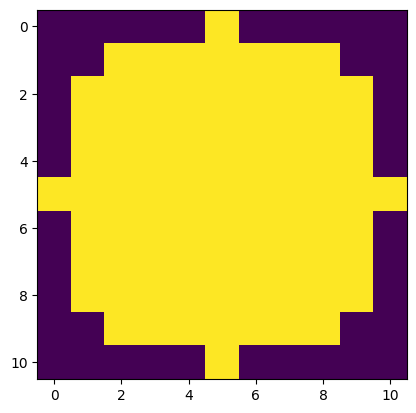

In [52]:
circle = create_circular_mask(RADIUS)
print(circle)
plt.imshow(circle)

In [53]:
RADIUS = 2 # unit? 

def create_mask(geo_points, geo_img):
    
    points = np_points(geo_points, geo_img).tolist()
    mask = np.zeros(geo_img.shape)
    #print(points)
    #print(mask)
    #print(mask.shape)
    
    for x, y in points:
        #print(RADIUS)
        #print("in the for: ", mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape)
        #print("before", circle)
        
        # row cutoff edge case / 2nd x val too large => 1st x val needs to be handled?
        #if mask[x - RADIUS : x + RADIUS + 1] > circle[]
        if ((y + RADIUS + 1) - 1668) > 0 :
            mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle[:-((y + RADIUS + 1) - 1668), :]
            #print("rad 2", (y + RADIUS + 1))
        if ((x + RADIUS + 1) - 1668) > 0 : #col cutoff case (2nd val)
            mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle[:, :-((x + RADIUS + 1)- 1668)]
            #print(x + RADIUS + 1)
        
        elif ((y + RADIUS + 1) - 1668) <= 0:
            #print("hi", ((y + RADIUS + 1) - 1668))
            
            mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle
        #print(circle)
    f, ax = plt.subplots(figsize=(40, 10))
    plt.imshow(mask)
        
    return mask

In [ ]:
# fp = r'data/Tile D5/Planet_D5_FullScene/20170929_145600-01_Mosaic_clip.tif' 
# #'data/Tile C4/Planet_C4_FullScene/20170501_145608-07_Mosaic_Clip.tif'
# shape_file = 'data\\Tile D5\\GTD_Trees_Location_D5.shp'
# #'data/Tile D5/GTD_Trees_Locations_D5.shp'

# planet_img = rasterio.open(fp)
# geo_points = gpd.read_file(shape_file)
# planet_img.crs, geo_points.crs

(CRS.from_epsg(32618),
 <Derived Projected CRS: PROJCRS["WGS 84 / UTM zone 18N",BASEGEOGCRS["WGS 8 ...>
 Name: WGS 84 / UTM zone 18N
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 - h[up]: Ellipsoidal height (metre)
 Area of Use:
 - undefined
 Coordinate Operation:
 - name: UTM zone 18N
 - method: Transverse Mercator
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [54]:
import matplotlib.image as mpimg 
from PIL import Image

### testing the rw of 1 sentinel image
# fp = r'data/Tile C4/Sentinel_C4/S2A_MSIL1C_20170716T153621_N0205_R068_T17NRJ_20170716T154039_Visual_clip.tif'
# sentinel_img = rasterio.open(fp)
#### SINGLE IMG TEST #####
# mask = create_mask(geo_points, planet_img)
# mask = mask.astype('uint8')
#############
# plt.imshow(mask)
# print(np.unique(mask))
# mask = Image.fromarray(mask*255) # for visualization
# mask.save('data/pngs/IMG1.png')
# plt.savefig(mask.astype('bool'), format = 'png')

NameError: name 'geo_points' is not defined

In [ ]:
# print(df.iloc[:16])

NameError: name 'df' is not defined

In [55]:
TIF_PATH = 'data/uncut_tif_masks/'
def generate_pngs():
    
    for idx in df.index:
        print(idx)
#        print(data_map[idx])
        tiff_name = pla_map[idx]
        # png_save_name = tiff_name.split('\\')[-1].replace('.tif', '.tif')
        # print(png_save_name)
#        break
        geo_img = rasterio.open(df.iloc[idx, 0]) #loop thru length of dataframe instead and pass idx 
    
        print(geo_img)
        image = geo_img.read()

        geo_points = gpd.read_file(df.iloc[idx, 1])
        print(geo_points)
        mask = create_mask(geo_points, geo_img)
        
        mask = Image.fromarray(mask*255) # for visualization
        # print(PNG_PATH + png_save_name) #For model - imread slice last channel
        mask = mask.convert('RGB')
        mask.save(TIF_PATH + tiff_name)

#     return image, mask

generate_pngs()

0
<open DatasetReader name='data\Tile C4\Planet_C4_FullScene\20170501_145608-07_Mosaic_Clip.tif' mode='r'>
   OBJECTID_1  OBJECTID  Note   ID       Lat        Lon  Site  \
0           1       174  None  163  7.858533 -77.865093  None   
1           2       175  None  164  7.858077 -77.869946  None   

                        geometry  
0  POINT (184033.554 869739.383)  
1  POINT (183497.639 869692.519)  


OSError: exception: access violation reading 0xFFFFFFFFFFFFFFFF

In [ ]:
# PNG_PATH = 'data/pngs/'
# def generate_pngs():
    
#     for idx in df.index:
#         print(idx)
# #        print(data_map[idx])
#         tiff_name = pla_map[idx]
#         png_save_name = tiff_name.split('\\')[-1].replace('.tif', '.png')
#         print(png_save_name)
# #        break
#         geo_img = rasterio.open(df.iloc[idx, 0]) #loop thru length of dataframe instead and pass idx 
    
#         print(geo_img)
#         image = geo_img.read()

#         geo_points = gpd.read_file(df.iloc[idx, 1])
#         print(geo_points)
#         mask = create_mask(geo_points, geo_img)
        
#         mask = Image.fromarray(mask*255) # for visualization
#         # print(PNG_PATH + png_save_name) #For model - imread slice last channel
#         mask = mask.convert('RGB')
#         mask.save(PNG_PATH + png_save_name)

# #     return image, mask

# generate_pngs()

In [ ]:
###################
# Model Dataloader #
###################

In [ ]:
class BigTreesDataset(Dataset):
  def __init__(self, df) -> None:
      super().__init__()
      self.df = df

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
        pass 
#     geo_img = rasterio.open(self.df.iloc[idx, 0])
#     image = geo_img.read()

#     geo_points = gpd.read_file(self.df.iloc[idx, 1])
#     mask = create_mask(geo_points, geo_img)

#     return image, mask


Until now we have two different size images, for planet and sentinel, and no transformation. The mask is represented as an aproximation point of the position of the giant trees. At the moment the images have 4 channels.